In [7]:
import numpy as np
from scipy.special import erfc
import matplotlib.pyplot as plt

In [8]:
M = 32
d = 2*np.sin(np.pi / M)

P_av = 1
kappa = 5
avSNR_pb_db = np.asarray(list(range(0, 25)))
av_SNR_per_bit = 10**(avSNR_pb_db / 10)
siw2 = P_av / (2*kappa*av_SNR_per_bit)
err = [0.75579, 0.72820, 0.69524, 0.66143, 0.62447, 0.58213, 0.53495, 0.48627, 0.43593, 0.38329]
err += [0.32710, 0.27022, 0.21782, 0.16645, 0.11983, 0.08031, 0.05100, 0.02851, 0.01341, 0.00598]
err += [ 0.00200, 0.00049, 0.00009, 0.00001]
inp = np.sqrt(d**2 / (8*siw2))
theor = erfc(inp)

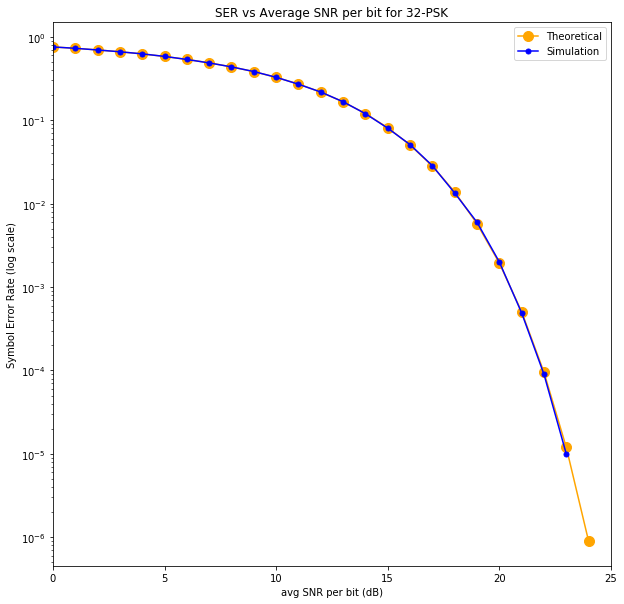

In [25]:
plt.figure(figsize=(10,10))
plt.plot(avSNR_pb_db, theor, "-o", markersize = 10, color = "orange", label = "Theoretical")
plt.plot(avSNR_pb_db[:-1], err, ".-", markersize = 10, color = "blue", label = "Simulation")
plt.yscale("log")
plt.xlabel("avg SNR per bit (dB)")
plt.ylabel("Symbol Error Rate (log scale)")
plt.title("SER vs Average SNR per bit for 32-PSK")
plt.xlim(0, 25)
plt.legend()
# plt.grid(True)
plt.savefig('avg_SNR.png')
plt.show()

In [26]:
Fs = 20
Ts = 1/Fs
alpha = 0.3*Ts
B = 5
pho = 0.11
p1 = []

def root_raised(t):
    denom = np.pi*np.sqrt(2*B)*(1 - 64*B**2*pho**2*t**2)
    t1 = 2*np.pi*B*t
    t2 = 2*np.pi*B*pho*t
    if (t != 0): num = 8*B*pho*np.cos(t1 + t2) + np.sin(t1 - t2)/t
    else : num = 8*B*pho + 2*np.pi*B*(1-pho)
    return num / denom

for n in range(-20, 21):
    p1.append(root_raised(n*Ts - alpha))
    
p1 = np.asarray(p1)
p2 = p1[::-1]
p3 = np.convolve(p1,p2)

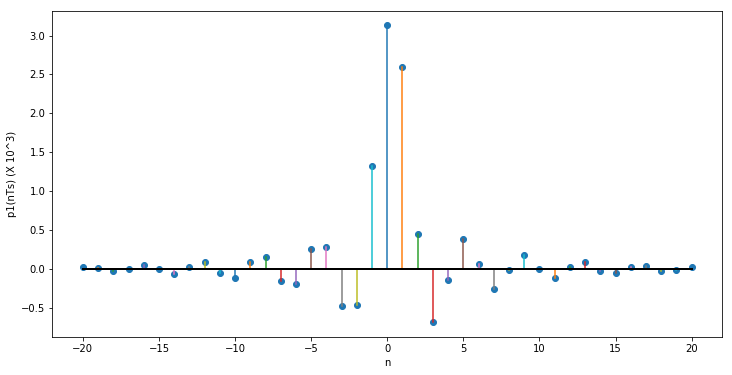

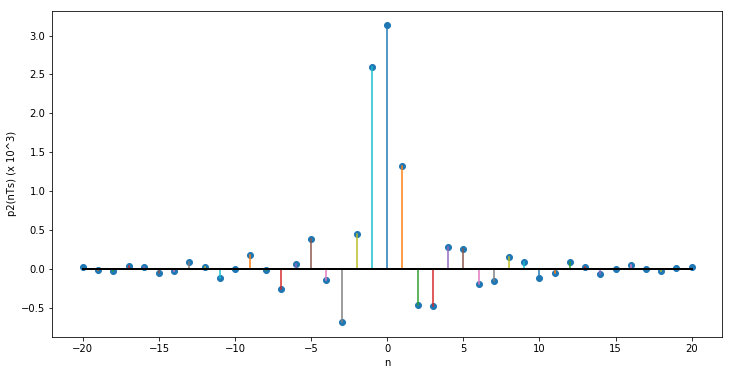

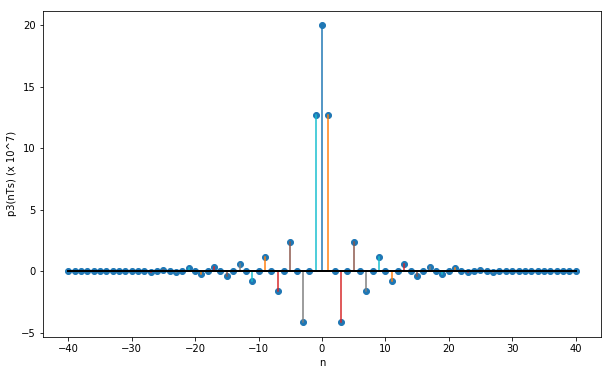

In [27]:
fig, ax = plt.subplots(figsize = (12,6))
markerline, stemlines, baseline = ax.stem(range(-20, 21), p1, "-")
plt.setp(baseline, color='black', linewidth=2)
# plt.setp(stemlines, color='b')
# plt.grid(True)
plt.ylabel("p1(nTs) (X 10^3)")
plt.xlabel("n")
plt.savefig("Tsalpha1.png")

fig, ax = plt.subplots(figsize = (12,6))
markerline, stemlines, baseline = ax.stem(range(-20, 21), p2, "-")
plt.setp(baseline, color='black', linewidth=2)
# plt.setp(stemlines, color='b')
# plt.grid(True)
plt.ylabel("p2(nTs) (x 10^3)")
plt.xlabel("n")
plt.savefig("Tsalpha2.png")

fig, ax = plt.subplots(figsize = (10,6))
markerline, stemlines, baseline = ax.stem(range(-40, 41), p3, "-")
plt.setp(baseline, color='black', linewidth=2)
# plt.setp(stemlines, color='b')
plt.ylabel("p3(nTs) (x 10^7)")
# plt.grid(True)
plt.xlabel("n")
plt.savefig('Tsalpha3.png')
plt.show()